<a href="https://colab.research.google.com/github/joseforneiro/DadosCovid19/blob/master/Trabalho_LabVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primeiro método de Série Temporal** (ForecasterAutoreg)
link: [Documentação](https://joaquinamatrodrigo.github.io/skforecast/api/ForecasterAutoreg.html)

In [39]:
# Importando o pandas

import pandas as pd

In [40]:
# Configuração do matplotlib (Biblioteca Python de plotagem 2d, que auxilia a biblioteca matemática NumPy)

!pip install matplotlib==3.5.0

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Folha de estilo FiveThirtyEight
plt.rcParams['lines.linewidth'] = 1.5 # Configuração da largura de linha
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# Instalando as bibliotecas Skforecast (previsão de séries temporais)
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# Etapa 1
# Importando o primeiro arquivo .csv (dados de vacinação contra Covid19) e mostrando as 5 primeiras linhas

url = 'https://raw.githubusercontent.com/joseforneiro/DadosCovid19/master/CovidVaccinations.csv'
data = pd.read_csv(url, sep=',')
data.head(5)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [43]:
# Contando quantas linhas tem a base de dados
data[data.columns[0]].count()

214716

In [44]:
# Filtrando as linhas da coluna location que contenham a palavra Brazil
data = data[data['location'].str.contains('Brazil')]
data.head(5)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
26699,BRA,South America,Brazil,26-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
26700,BRA,South America,Brazil,27-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
26701,BRA,South America,Brazil,28-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
26702,BRA,South America,Brazil,29-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.891915
26703,BRA,South America,Brazil,01-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [45]:
# Contando quantas linhas tem a base de dados
data[data.columns[0]].count()

925

In [46]:
# Deixando somente as colunas necessárias
data = data[['location','date','new_tests','people_vaccinated']]
data.head(5)

,location,date,new_tests,people_vaccinated
26699,Brazil,26-02-20,NaN,NaN
26700,Brazil,27-02-20,NaN,NaN
26701,Brazil,28-02-20,NaN,NaN
26702,Brazil,29-02-20,NaN,NaN
26703,Brazil,01-03-20,NaN,NaN


In [47]:
# Printando os tipos de dados das colunas
print(data.dtypes)

location              object
date                  object
new_tests            float64
people_vaccinated    float64
dtype: object


In [48]:
# Etapa 2
# Importando o segundo arquivo .csv (dados de infecção por Covid19) e mostrando as 5 primeiras linhas
url = 'https://raw.githubusercontent.com/joseforneiro/DadosCovid19/master/CovidDeaths.csv'
data2 = pd.read_csv(url, sep=',')
data2.head(5)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
0,AFG,Asia,Afghanistan,24-02-20,40099462.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Contando quantas linhas tem a base de dados
data2[data2.columns[0]].count()

214716

In [50]:
# Filtrando as linhas da coluna location que contenham a palavra Brazil
data2 = data2[data2['location'].str.contains('Brazil')]
data2.head(5)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
26699,BRA,South America,Brazil,26-02-20,214326223.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26700,BRA,South America,Brazil,27-02-20,214326223.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26701,BRA,South America,Brazil,28-02-20,214326223.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26702,BRA,South America,Brazil,29-02-20,214326223.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26703,BRA,South America,Brazil,01-03-20,214326223.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Contando quantas linhas tem a base de dados
data2[data2.columns[0]].count()

925

In [52]:
# Deixando somente as colunas necessárias
data2 = data2[['location','date','new_cases','new_deaths']]
data2.head(5)

,location,date,new_cases,new_deaths
26699,Brazil,26-02-20,1.0,NaN
26700,Brazil,27-02-20,0.0,NaN
26701,Brazil,28-02-20,0.0,NaN
26702,Brazil,29-02-20,1.0,NaN
26703,Brazil,01-03-20,0.0,NaN


In [53]:
# Printando os tipos de dados das colunas
print(data2.dtypes)

location       object
date           object
new_cases     float64
new_deaths    float64
dtype: object


In [54]:
# Unindo as duas bases de dados
datatotal = pd.merge(data, data2, how = 'inner', on = ('location', 'date'))
datatotal.head(5)

,location,date,new_tests,people_vaccinated,new_cases,new_deaths
0,Brazil,26-02-20,NaN,NaN,1.0,NaN
1,Brazil,27-02-20,NaN,NaN,0.0,NaN
2,Brazil,28-02-20,NaN,NaN,0.0,NaN
3,Brazil,29-02-20,NaN,NaN,1.0,NaN
4,Brazil,01-03-20,NaN,NaN,0.0,NaN


In [55]:
# Alterando o nome das colunas
datatotal = datatotal.rename(columns = {'location':'pais', 'date':'datas', 'new_tests':'novos_testes', 'people_vaccinated':'pessoas_vacinadas', 'new_cases':'novos_casos', 'new_deaths':'novas_mortes'})
datatotal.head(5)

,pais,datas,novos_testes,pessoas_vacinadas,novos_casos,novas_mortes
0,Brazil,26-02-20,NaN,NaN,1.0,NaN
1,Brazil,27-02-20,NaN,NaN,0.0,NaN
2,Brazil,28-02-20,NaN,NaN,0.0,NaN
3,Brazil,29-02-20,NaN,NaN,1.0,NaN
4,Brazil,01-03-20,NaN,NaN,0.0,NaN


In [56]:
# Substituindo NAN por 0:
datatotal = datatotal.fillna (0)
datatotal.head(5)

,pais,datas,novos_testes,pessoas_vacinadas,novos_casos,novas_mortes
0,Brazil,26-02-20,0.0,0.0,1.0,0.0
1,Brazil,27-02-20,0.0,0.0,0.0,0.0
2,Brazil,28-02-20,0.0,0.0,0.0,0.0
3,Brazil,29-02-20,0.0,0.0,1.0,0.0
4,Brazil,01-03-20,0.0,0.0,0.0,0.0


In [57]:
# Contando quantas linhas tem a base de dados
datatotal[datatotal.columns[0]].count()

925

In [58]:
# Printando os tipos de dados das colunas
print(datatotal.dtypes)

pais                  object
datas                 object
novos_testes         float64
pessoas_vacinadas    float64
novos_casos          float64
novas_mortes         float64
dtype: object


In [59]:
# Alterando o formato da data
datatotal['datas'] = datatotal['datas'].str.replace('-','/')
datatotal.head(5)

,pais,datas,novos_testes,pessoas_vacinadas,novos_casos,novas_mortes
0,Brazil,26/02/20,0.0,0.0,1.0,0.0
1,Brazil,27/02/20,0.0,0.0,0.0,0.0
2,Brazil,28/02/20,0.0,0.0,0.0,0.0
3,Brazil,29/02/20,0.0,0.0,1.0,0.0
4,Brazil,01/03/20,0.0,0.0,0.0,0.0


In [60]:
# Converte data de string para datetime e transforma em índice
datatotal['datas'] = pd.to_datetime(datatotal['datas'], format='%d/%m/%y')
datatotal = datatotal.set_index('datas')
datatotal = datatotal.asfreq('D')
datatotal = datatotal.sort_index()

datatotal.head(10)

,pais,novos_testes,pessoas_vacinadas,novos_casos,novas_mortes
datas,,,,,
2020-02-26,Brazil,0.0,0.0,1.0,0.0
2020-02-27,Brazil,0.0,0.0,0.0,0.0
2020-02-28,Brazil,0.0,0.0,0.0,0.0
2020-02-29,Brazil,0.0,0.0,1.0,0.0
2020-03-01,Brazil,0.0,0.0,0.0,0.0
2020-03-02,Brazil,0.0,0.0,0.0,0.0
2020-03-03,Brazil,0.0,0.0,0.0,0.0
2020-03-04,Brazil,0.0,0.0,2.0,0.0
2020-03-05,Brazil,0.0,0.0,0.0,0.0


In [61]:
# Substituindo os valores 0 da coluna pessoas_vacinadas pelo valor da linhha anterior
last_value = 0
for index in datatotal.index:
  if datatotal["pessoas_vacinadas"][index] > 0:
    last_value = datatotal["pessoas_vacinadas"][index]
  if datatotal["pessoas_vacinadas"][index] == 0:
    datatotal.at[index, "pessoas_vacinadas"] = last_value
datatotal.head(31)

,pais,novos_testes,pessoas_vacinadas,novos_casos,novas_mortes
datas,,,,,
2020-02-26,Brazil,0.0,0.0,1.0,0.0
2020-02-27,Brazil,0.0,0.0,0.0,0.0
2020-02-28,Brazil,0.0,0.0,0.0,0.0
2020-02-29,Brazil,0.0,0.0,1.0,0.0
2020-03-01,Brazil,0.0,0.0,0.0,0.0
2020-03-02,Brazil,0.0,0.0,0.0,0.0
2020-03-03,Brazil,0.0,0.0,0.0,0.0
2020-03-04,Brazil,0.0,0.0,2.0,0.0
2020-03-05,Brazil,0.0,0.0,0.0,0.0


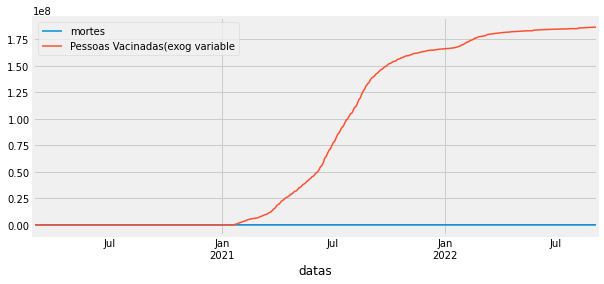

In [62]:
# Plota os dados valores exogenos (quer podem interferir no resultado)
fig, ax = plt.subplots(figsize=(9, 4))
datatotal['novas_mortes'].plot(ax=ax, label='mortes')
datatotal['pessoas_vacinadas'].plot(ax=ax, label='Pessoas Vacinadas(exog variable')
ax.legend();

In [63]:
# Verifica o número de linhas com valores ausentes
print(f'Number of rows with missing values: {datatotal.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [64]:
# Código para verificar se não existem "buracos" nos dados
(datatotal.index == pd.date_range(start=datatotal.index.min(),
                             end=datatotal.index.max(),
                             freq=datatotal.index.freq)).all()

True

In [65]:
# Em caso de buracos, podemos preencher os valores (Importante: verificar a frequência)
# data.asfreq(freq='30min', fill_value=np.nan)

Train dates : 2020-02-26 00:00:00 --- 2022-02-19 00:00:00  (n=725)
Test dates  : 2022-02-20 00:00:00 --- 2022-09-07 00:00:00  (n=200)


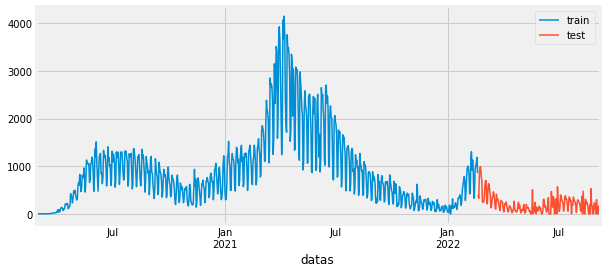

In [66]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 200
data_train = datatotal[:-steps]
data_test  = datatotal[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['novas_mortes'].plot(ax=ax, label='train')
data_test['novas_mortes'].plot(ax=ax, label='test')
ax.legend();

In [67]:
# Configura e treina um RandomForestRegressor para série temporal
# Os parâmetros foram retirados do melhor modelo encontrado no material de origem
# Para conseguir os melhores parâmetros se faz necessário realizer hyperparameter tunning (verifique artigo original)
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123),
                lags      = 12
             )

forecaster.fit(y=data_train['novas_mortes'], exog=data_train['pessoas_vacinadas'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.series.Series'> 
Exogenous variables names: pessoas_vacinadas 
Training range: [Timestamp('2020-02-26 00:00:00'), Timestamp('2022-02-19 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-11-14 12:51:57 
Last fit date: 2022-11-14 12:51:57 
Skforecast version: 0.5.

In [68]:
# Faz predição no conjunto de teste
steps = 200
predictions = forecaster.predict(steps=steps, exog=data_test['pessoas_vacinadas'])
predictions.head(20)

2022-02-20     429.444554
2022-02-21     566.854606
2022-02-22     981.831227
2022-02-23    1033.372825
2022-02-24    1055.097379
2022-02-25    1117.833886
2022-02-26     901.366063
2022-02-27     416.320943
2022-02-28     589.675545
2022-03-01     999.814979
2022-03-02    1049.760206
2022-03-03    1058.220515
2022-03-04    1077.725984
2022-03-05     880.837256
2022-03-06     410.662442
2022-03-07     608.705955
2022-03-08     973.073776
2022-03-09    1025.409301
2022-03-10    1044.659348
2022-03-11    1000.182061
Freq: D, Name: pred, dtype: float64

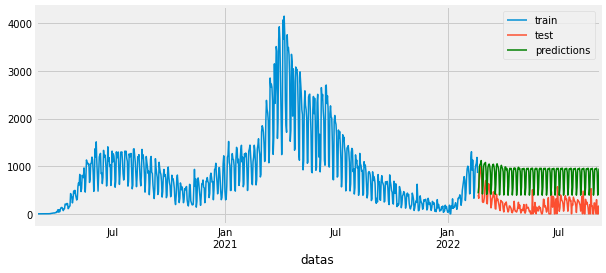

In [69]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
data_train['novas_mortes'].plot(ax=ax, label='train')
data_test['novas_mortes'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend();